In [28]:
import os
curr_dir = os.getcwd()
dataset_dir = os.path.join(curr_dir,'Dataset')

In [29]:
os.listdir(dataset_dir)

['.ipynb_checkpoints',
 'kannada_offensive_dev.csv',
 'kannada_offensive_train.csv',
 'mal_full_offensive_dev.csv',
 'mal_full_offensive_dev_corrected.csv',
 'mal_full_offensive_train.csv',
 'mal_full_offensive_train_corrected.csv',
 'tamil_offensive_full_dev.csv',
 'tamil_offensive_full_dev_corrected.csv',
 'tamil_offensive_full_train.csv',
 'tamil_offensive_full_train_corrected.csv']

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
mal_full_offensive_dev = pd.read_csv(os.path.join(dataset_dir,'mal_full_offensive_dev.csv'),sep = '\t') 
mal_full_offensive_train = pd.read_csv(os.path.join(dataset_dir,'mal_full_offensive_train.csv') , sep = '\t')

In [32]:
mal_full_offensive_train.head()

,പലദേശം. പല ഭാഷ ഒരേ ഒരു രാജാവ് അല്ലാതെ സ്വന്തം രാജവയത് അല്ല,Not_offensive,Unnamed: 2
0,ഈ ഓണം ഏട്ടനും പിള്ളേർക്ക് ഉള്ളതാണ് എന്ന് ഉള്ളവ...,Not_offensive,NaN
1,ആരണ്ട ആരണ്ട തലുണ്ടാകാണാ ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്...,Not_offensive,NaN
2,Sushin syam Shaiju khalid Midhun manual,Not_offensive,NaN
3,J A K E S. B EJ O Y !!!,Not_offensive,NaN
4,Pwoli item padam kananda ennu karuthiyatha pak...,Not_offensive,NaN


In [33]:
mal_full_offensive_train.columns

Index(['പലദേശം. പല ഭാഷ ഒരേ ഒരു രാജാവ്  അല്ലാതെ  സ്വന്തം രാജവയത് അല്ല',
       'Not_offensive', 'Unnamed: 2'],
      dtype='object')

In [34]:
def split_text_on_tabs(text):
    import re
    s = re.split('\t',str(text))
    return len(s)

In [35]:
# df = mal_full_offensive_train['പലദേശം. പല ഭാഷ ഒരേ ഒരു രാജാവ്  അല്ലാതെ  സ്വന്തം രാജവയത് അല്ല\tNot_offensive\t'].apply(split_text_on_tabs)
# for i,val in enumerate(df):
#     if val!=2:
#         pass
#         #print(i)
# print(mal_full_offensive_train.iloc[5,:].values)

In [36]:
mal_full_offensive_train['Not_offensive'].value_counts()

Not_offensive                           14152
not-malayalam                            1287
Offensive_Targeted_Insult_Individual      239
Offensive_Untargetede                     191
Offensive_Targeted_Insult_Group           140
Name: Not_offensive, dtype: int64

In [37]:
mal_full_offensive_train.drop('Unnamed: 2',axis = 1,inplace = True)

In [38]:
mal_full_offensive_train.columns

Index(['പലദേശം. പല ഭാഷ ഒരേ ഒരു രാജാവ്  അല്ലാതെ  സ്വന്തം രാജവയത് അല്ല', 'Not_offensive'], dtype='object')

In [39]:
mal_full_offensive_train.rename(columns = {'പലദേശം. പല ഭാഷ ഒരേ ഒരു രാജാവ്  അല്ലാതെ  സ്വന്തം രാജവയത് അല്ല':'text',
                                           'Not_offensive':'label'},inplace = True)
length  = len(mal_full_offensive_train)
mal_full_offensive_train

,text,label
0,ഈ ഓണം ഏട്ടനും പിള്ളേർക്ക് ഉള്ളതാണ് എന്ന് ഉള്ളവ...,Not_offensive
1,ആരണ്ട ആരണ്ട തലുണ്ടാകാണാ ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്...,Not_offensive
2,Sushin syam Shaiju khalid Midhun manual,Not_offensive
3,J A K E S. B EJ O Y !!!,Not_offensive
4,Pwoli item padam kananda ennu karuthiyatha pak...,Not_offensive
...,...,...
16004,കട്ട ലാലേട്ടൻ ഫാൻസിന് ദൈവത്തെ ഓർത്ത് അമിത പ്രത...,Not_offensive
16005,ente mammookka ningal puliyalla oru simhama......,Not_offensive
16006,Lucifer mass dialogues Ellam onnu comment chey...,Not_offensive
16007,Like from Madurai (Tamil nadu) ....,not-malayalam


In [40]:
mal_full_offensive_train.loc[length] = ['പലദേശം. പല ഭാഷ ഒരേ ഒരു രാജാവ്  അല്ലാതെ  സ്വന്തം രാജവയത് അല്ല',
                                        'Not_offensive']

In [41]:
mal_full_offensive_train

,text,label
0,ഈ ഓണം ഏട്ടനും പിള്ളേർക്ക് ഉള്ളതാണ് എന്ന് ഉള്ളവ...,Not_offensive
1,ആരണ്ട ആരണ്ട തലുണ്ടാകാണാ ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്...,Not_offensive
2,Sushin syam Shaiju khalid Midhun manual,Not_offensive
3,J A K E S. B EJ O Y !!!,Not_offensive
4,Pwoli item padam kananda ennu karuthiyatha pak...,Not_offensive
...,...,...
16005,ente mammookka ningal puliyalla oru simhama......,Not_offensive
16006,Lucifer mass dialogues Ellam onnu comment chey...,Not_offensive
16007,Like from Madurai (Tamil nadu) ....,not-malayalam
16008,അടിമകൾ ആയി ജീവിച്ചു മാറിക്കയല്ല ചാവേറായി ചാവാറ...,Not_offensive


In [42]:
mal_full_offensive_train.to_csv(os.path.join(dataset_dir,'mal_full_offensive_train_corrected.csv'),index = False)

In [43]:
mal_full_offensive_train['label'].value_counts()

Not_offensive                           14153
not-malayalam                            1287
Offensive_Targeted_Insult_Individual      239
Offensive_Untargetede                     191
Offensive_Targeted_Insult_Group           140
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

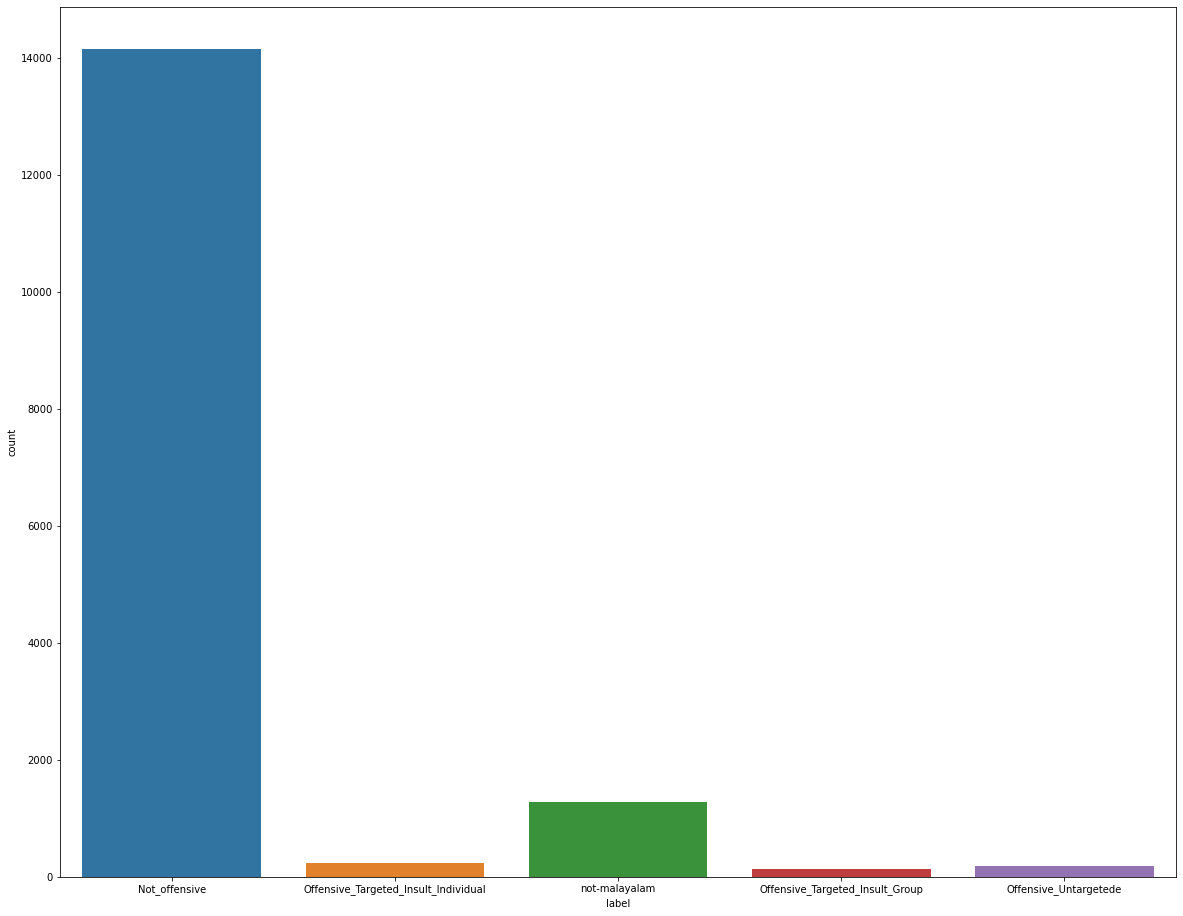

In [45]:
plt.figure(figsize = (20,16))
sns.countplot(x = mal_full_offensive_train['label'])

In [46]:
mal_full_offensive_dev.drop('Unnamed: 2',axis = 1,inplace = True)

In [47]:
mal_full_offensive_dev.columns

Index(['Gopichettante BGM um mammookayum ishtapedunnavar like !?', 'Not_offensive'], dtype='object')

In [48]:
mal_full_offensive_dev.rename(columns = {'Gopichettante BGM um mammookayum ishtapedunnavar like !?':'text',
                                           'Not_offensive':'label'},inplace = True)
length  = len(mal_full_offensive_dev)
mal_full_offensive_dev

,text,label
0,ഇത് ഒരു പെണ്ണ് തന്നെ ആണോ direct ചെയ്യുന്നത് p...,Not_offensive
1,പൃഥ്വിരാജ് സുരാജേട്ടൻ ലാലും അലക്സ്.. Lal jr. ന...,Not_offensive
2,പോകരുത് മക്കളെ പോക്ക .......... നൻ കണ്ട് എന്റ്...,Not_offensive
3,avan Varum ente Makan Madhura Raja....,Not_offensive
4,you guys dub in kannada we are kannadigas alwa...,not-malayalam
...,...,...
1993,Onnam ഇട്ടി മണി & brathors ഡേ വിന്നർ ലാലേട്ടൻ ...,Not_offensive
1994,Manju chechi undel hero vendaa. Chechi vere le...,Not_offensive
1995,Ith kollaaaam....kanda ooodayp trailer ne kalu...,Not_offensive
1996,Ufffff. Pwoli lalattaa... Katta waiting,Not_offensive


In [49]:
mal_full_offensive_dev.loc[length] = ['Gopichettante BGM um mammookayum ishtapedunnavar like !?', 'Not_offensive']

In [50]:
mal_full_offensive_dev

,text,label
0,ഇത് ഒരു പെണ്ണ് തന്നെ ആണോ direct ചെയ്യുന്നത് p...,Not_offensive
1,പൃഥ്വിരാജ് സുരാജേട്ടൻ ലാലും അലക്സ്.. Lal jr. ന...,Not_offensive
2,പോകരുത് മക്കളെ പോക്ക .......... നൻ കണ്ട് എന്റ്...,Not_offensive
3,avan Varum ente Makan Madhura Raja....,Not_offensive
4,you guys dub in kannada we are kannadigas alwa...,not-malayalam
...,...,...
1994,Manju chechi undel hero vendaa. Chechi vere le...,Not_offensive
1995,Ith kollaaaam....kanda ooodayp trailer ne kalu...,Not_offensive
1996,Ufffff. Pwoli lalattaa... Katta waiting,Not_offensive
1997,trailer kollam but oru tamil movie remake anu ...,Not_offensive


In [51]:
mal_full_offensive_dev.to_csv(os.path.join(dataset_dir,'mal_full_offensive_dev_corrected.csv'),index = False)

<AxesSubplot:xlabel='label', ylabel='count'>

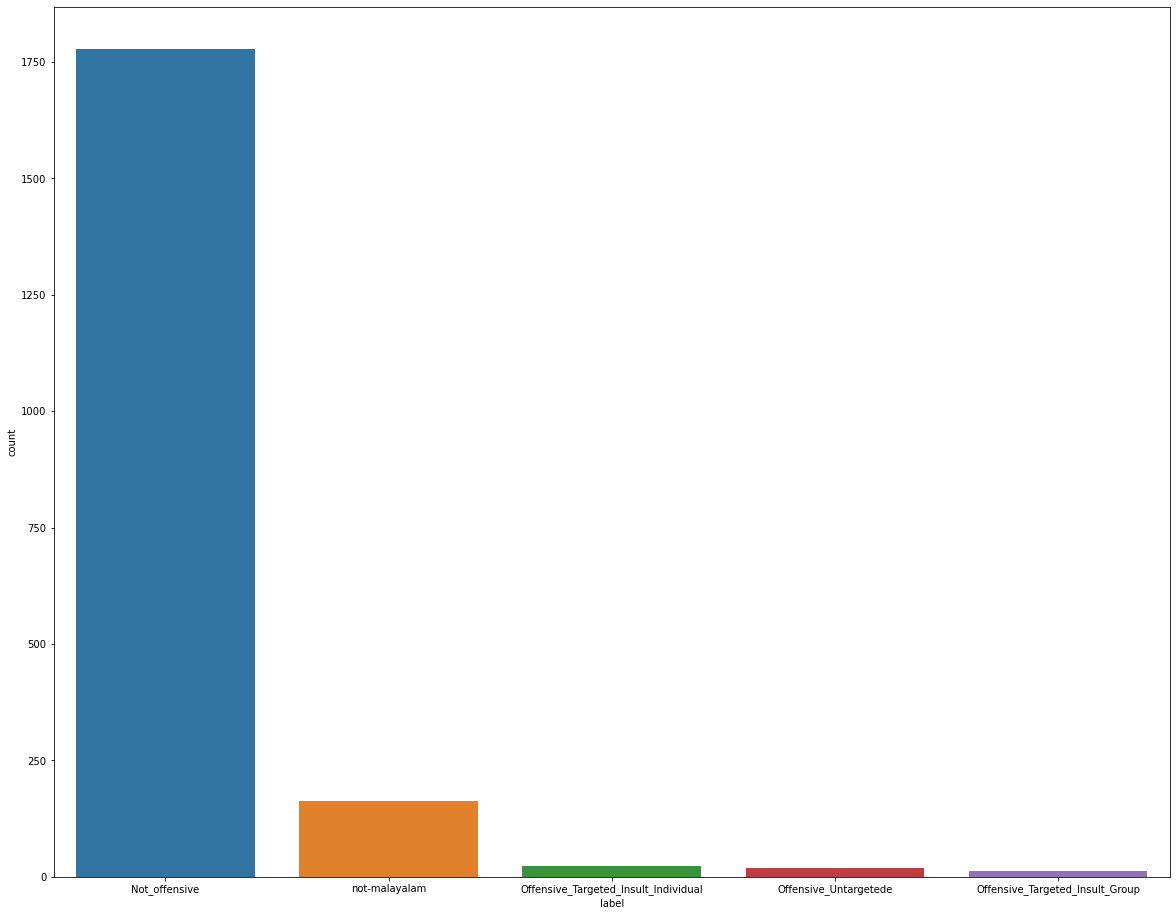

In [52]:
plt.figure(figsize = (20,16))
sns.countplot(x = mal_full_offensive_dev['label'])

In [54]:
mal_full_offensive_dev['label'].value_counts()

Not_offensive                           1779
not-malayalam                            163
Offensive_Targeted_Insult_Individual      24
Offensive_Untargetede                     20
Offensive_Targeted_Insult_Group           13
Name: label, dtype: int64